<!--NAVIGATION-->

<a target="_blank" href="https://colab.research.google.com/github/bpesquet/machine-learning-handbook/blob/master/notebooks/models/neural_networks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Artificial Neural Networks

## Summary

- Introduction to artificial neural networks
- Training neural networks with Keras
- Neural networks tuning

## Introduction to artificial neural networks

### The origins

- 1943 : first mathematical model of a biological neuron (McCulloch & Pitts)
- 1949 : Hebb's rule
- 1958 : The perceptron (F. Rosenblatt)
- 1969 : Limits of perceptrons (M. Minsky)

### A biological inspiration

![Neuron](images/neuron.png)

### McCulloch & Pitts' formal neuron

![Formal neuron model](images/neuron_model.jpeg)

### Hebb's rule

Attempt to explain synaptic plasticity, the adaptation of brain neurons during the learning process.

> "The general idea is an old one, that any two cells or systems of cells that are repeatedly active at the same time will tend to become 'associated' so that activity in one facilitates activity in the other."

### Franck Rosenblatt's perceptron

![The Perceptron](images/Perceptron.jpg)

### The perceptron learning algorithm

1. Init randomly the $\omega$ connection weights.
1. For each training sample $x^{(i)}$:
    1. Compute the perceptron output $y'^{(i)}$
    1. Adjust weights : $\omega_{next} = \omega + \eta (y^{(i)} - y'^{(i)}) x^{(i)}$

### The MultiLayer Perceptron (MLP)

![MultiLayer Perceptron](images/neural_net2.jpeg)

### Minsky's critic

One perceptron cannot learn non-linearly separable functions.

![XOR problem](images/xor.png)

At the time, no learning algorithm existed for training the hidden layers of a MLP.

### Decisive breakthroughs

- 1974 : Backpropagation theory (P. Werbos)
- 1986 : Learning through backpropagation (Rumelhart, Hinton, Williams)
- 1989 : Universal approximation theorem (Hornik, Stinchcombe, White)
- 1989 : first researchs on deep neural nets (LeCun, Bengio)

### The deep learning tsunami

- 2012 : AlexNet (Krizhevsky, Sutskever, Hinton) wins the ImageNet competition.
- 2016 : AlphaGo (DeepMind) beats Go master Lee Sedol by 4 victories to 1.
- 2017 : AlphaZero reaches a surhuman level at Go and chess in less than 24 hours.
- ...

### Anatomy of a network

![A neural network](images/nn_weights.png)

### Learning algorithm

[![Extract from the book Deep Learning with Python](images/nn_learning.jpg)](https://www.manning.com/books/deep-learning-with-python)

### Training and inference

![Training and inference](images/training_inference1.png)

### Neuron output

![Neuron output](images/neuron_output.png)

### Activation functions

- Applied to the weighted sum of neuron inputs to produce its output.
- Always non-linear. If not, the whole network could only apply a linear transformation to its inputs and couldn't solve complex problems.
- The main ones are:
  - **sigmoid** (*logistic function*)
  - **tanh** (*hyberbolic tangent*)
  - **ReLU** (*Rectified Linear Unit*)
  
$$\sigma(z) = \frac{1}{1 + e^{-z}}\;\;\;
tanh(z) = 2\sigma(2z) - 1\;\;\;
ReLU(z) = max(0,z)$$


### Environment setup

In [1]:
import platform
print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib
import matplotlib.py plot as plt
from matplotlib.colors import ListedColormap 
import seaborn as sns
import pandas as pd

Python version: 3.7.5


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Define activation functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return 2 * sigmoid(2 * z) - 1

def relu(z):
    return np.maximum(0, z)

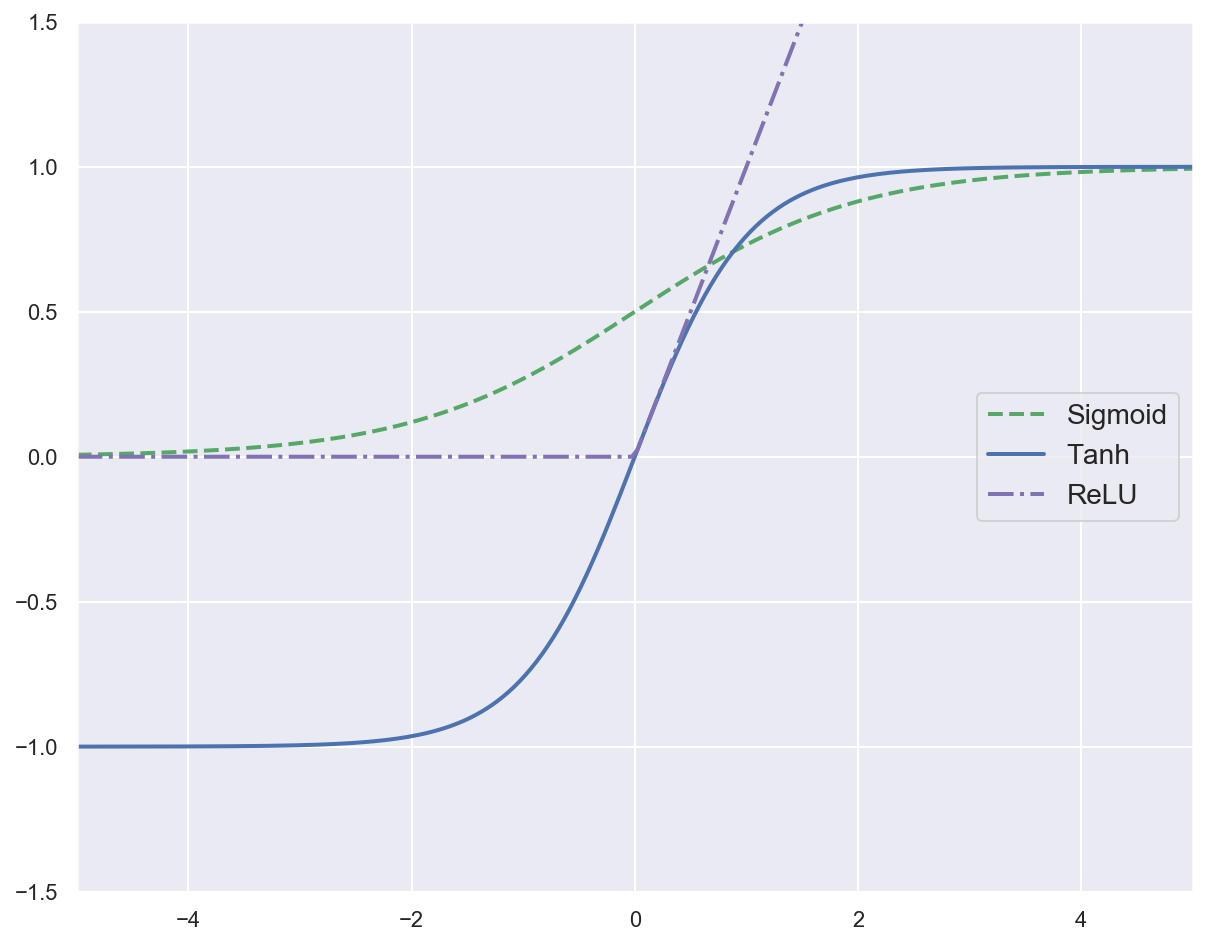

In [4]:
# Plot activation functions
z = np.linspace(-5, 5, 200)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.legend(loc="right", fontsize=14)
plt.axis([-5, 5, -1.5, 1.5])
plt.show()

### Weights initialization

To facilitate training, initial weights must be:

- non-zero
- random
- have small values

[Several techniques exist](https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79). A commonly used one is [Xavier initialization](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf).

## Vectorization of computations

![NN matrixes](images/nn_matrixes.png)

### Layer 1 output

![Layer 1 output](images/output_layer1.png)

### Layer 2 output

![Layer 2 output](images/output_layer2.png)

### Layer 3 output

![Layer 3 output](images/output_layer3.png)

### Weights update

Objective: minimize the loss function that computes the distance between expected and actual results.

Method : [gradient descent](https://github.com/bpesquet/machine-learning-handbook/blob/master/notebooks/workflow/ml_fundamentals.ipynb)

$$\boldsymbol{\theta_{next}} = \boldsymbol{\theta} - \eta\nabla_{\boldsymbol{\theta}}\mathcal{L}(\boldsymbol{\theta})$$

### Backpropagation

Objective: compute the loss function gradient *wrt* all its parameters (the network weights).

Method: apply the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) to compute partial derivatives backwards, starting from the current output.

[Backprop explained visually](https://developers-dot-devsite-v2-prod.appspot.com/machine-learning/crash-course/backprop-scroll)

### Demo time!

Tinker with a simplified neural network on the [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36248&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=true&noise_hide=true&discretize_hide=true&regularization_hide=true&batchSize_hide=true&regularizationRate_hide=true&percTrainData_hide=true).

## Training neural networks with Keras

### Keras in a nutshell

Keras is a neural networks library created by [François Chollet](https://twitter.com/fchollet).

[![Keras logo](images/keras_logo.png)](https://keras.io)

it offers a high-level, user-friendly API for creating and training neural nets.

### Keras and TensorFlow

- [TensorFlow](https://www.tensorflow.org/) is a plaform for Machine Learning and Deep Learning created by Google.
- Originally, Keras could be used with many ML librairies as back-end: TensorFlow 1.x, Theano, CNTK...
- Since TF 2.0, _tf.keras_ is the official high-level API of TensorFlow.
- The [2.3.0 release](https://github.com/keras-team/keras/releases/tag/2.3.0) (Sept. 2019) was the last major release of multi-backend Keras.
- TF users should switch to _tf.keras_.

[TF 2.0 + Keras Overview](https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO)

### Example: training a binary classifier on moon-shaped data

Inspired by [this article](https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6).

In [5]:
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

from sklearn.datasets import make_moons, make_circles

import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist, imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

scikit-learn version: 0.22.1
TensorFlow version: 2.0.0
Keras version: 2.2.4-tf


In [6]:
def plot_planar_data(X, y):
    """Plot some 2D data"""

    plt.figure()
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob', alpha=0.5, label=1)
    plt.legend()


def plot_decision_boundary(pred_func, X, y, figure=None):
    """Plot a decision boundary"""

    if figure is None:  # If no figure is given, create a new one
        plt.figure()
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)


def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy
    Takes a Keras History object as parameter"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['accuracy']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

x_train: (1000, 2). y_train: (1000,)


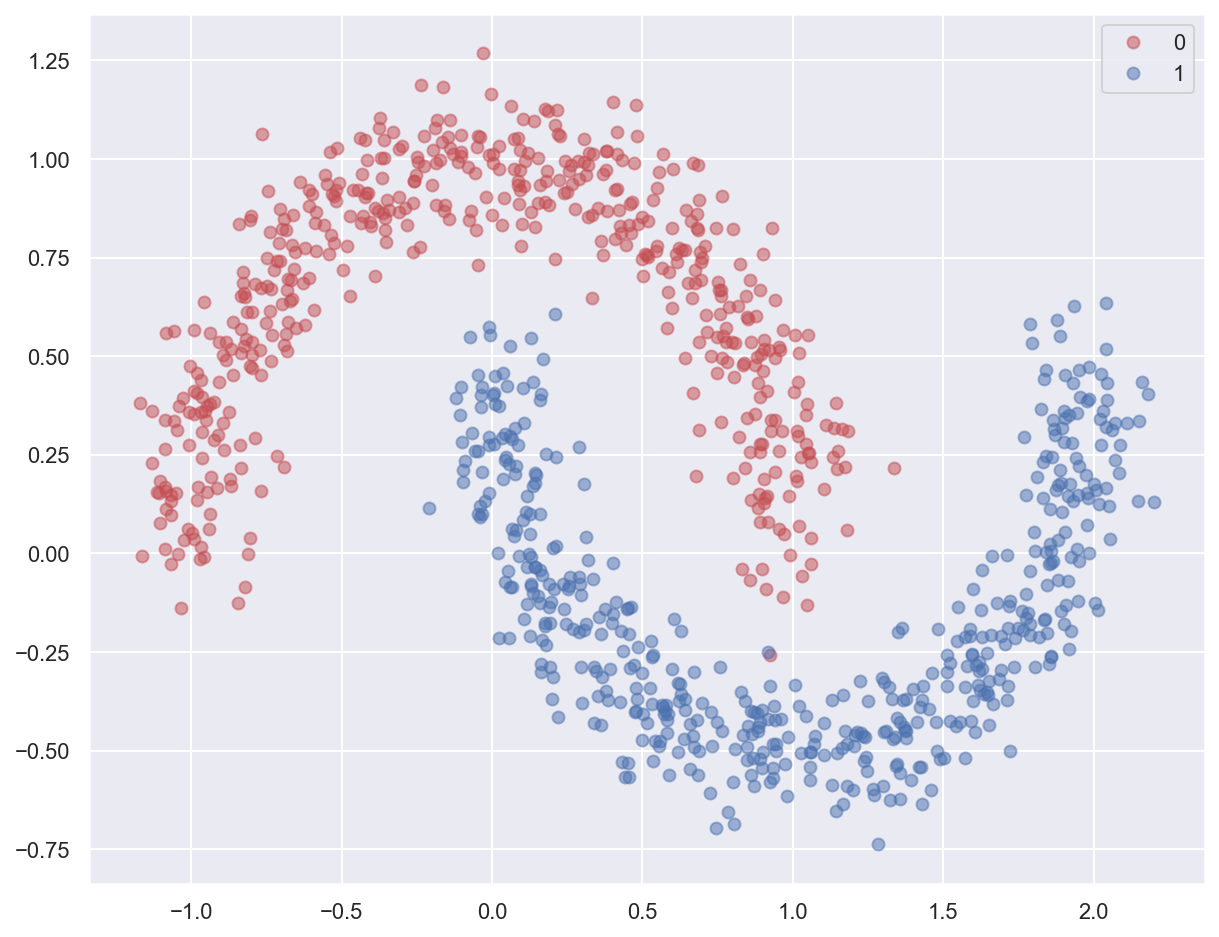

In [7]:
# Generate moon-shaped, non-linearly separable data
x_train, y_train = make_moons(n_samples=1000, noise=0.10, random_state=0)

print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
plot_planar_data(x_train, y_train)

In [8]:
# Create a new neural network as a linear stack of layers (other architectures exist)
model = Sequential()

# Add a 3-neurons hidden layer using tanh as activation function
# Input shape corresponds to the input layer (number of features, here 2 for 2D data)
model.add(Dense(3, activation='tanh', input_shape=(2,)))

# Add a 1-neuron output layer using sigmoid as activation function
model.add(Dense(1, activation='sigmoid'))

# Describe the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Configuration of the training process
#   optimizer: gradient descent optimization method (here: mini-batch SGD)
#   loss: loss function
#   metrics: list of metrics monitored during training and testing
model.compile(optimizer=SGD(learning_rate=1.0), loss='binary_crossentropy', metrics=['accuracy'])

# Launch the training of the network on the data
#   verbose: level of information outputted during training
#     (0 = silent, 1 = progress bar, 2 = one line per epoch)
#   epochs: number of epochs to train the model
#     (An epoch is an iteration over the entire training dataset)
#   batch_size: number of samples used for each GD step
#     (Number of GD steps in an epoch = number of samples / batch_size)
# The returned history object contains the monitored metrics
history = model.fit(x_train, y_train, verbose=0, epochs=40, batch_size=32)

In [10]:
# Compute the loss & metrics values for the trained network
loss, acc = model.evaluate(x_train, y_train, verbose=0)

print(f"Training loss: {loss:.05f}")
print(f"Training accuracy: {acc:.05f}")

Training loss: 0.00956
Training accuracy: 0.99900


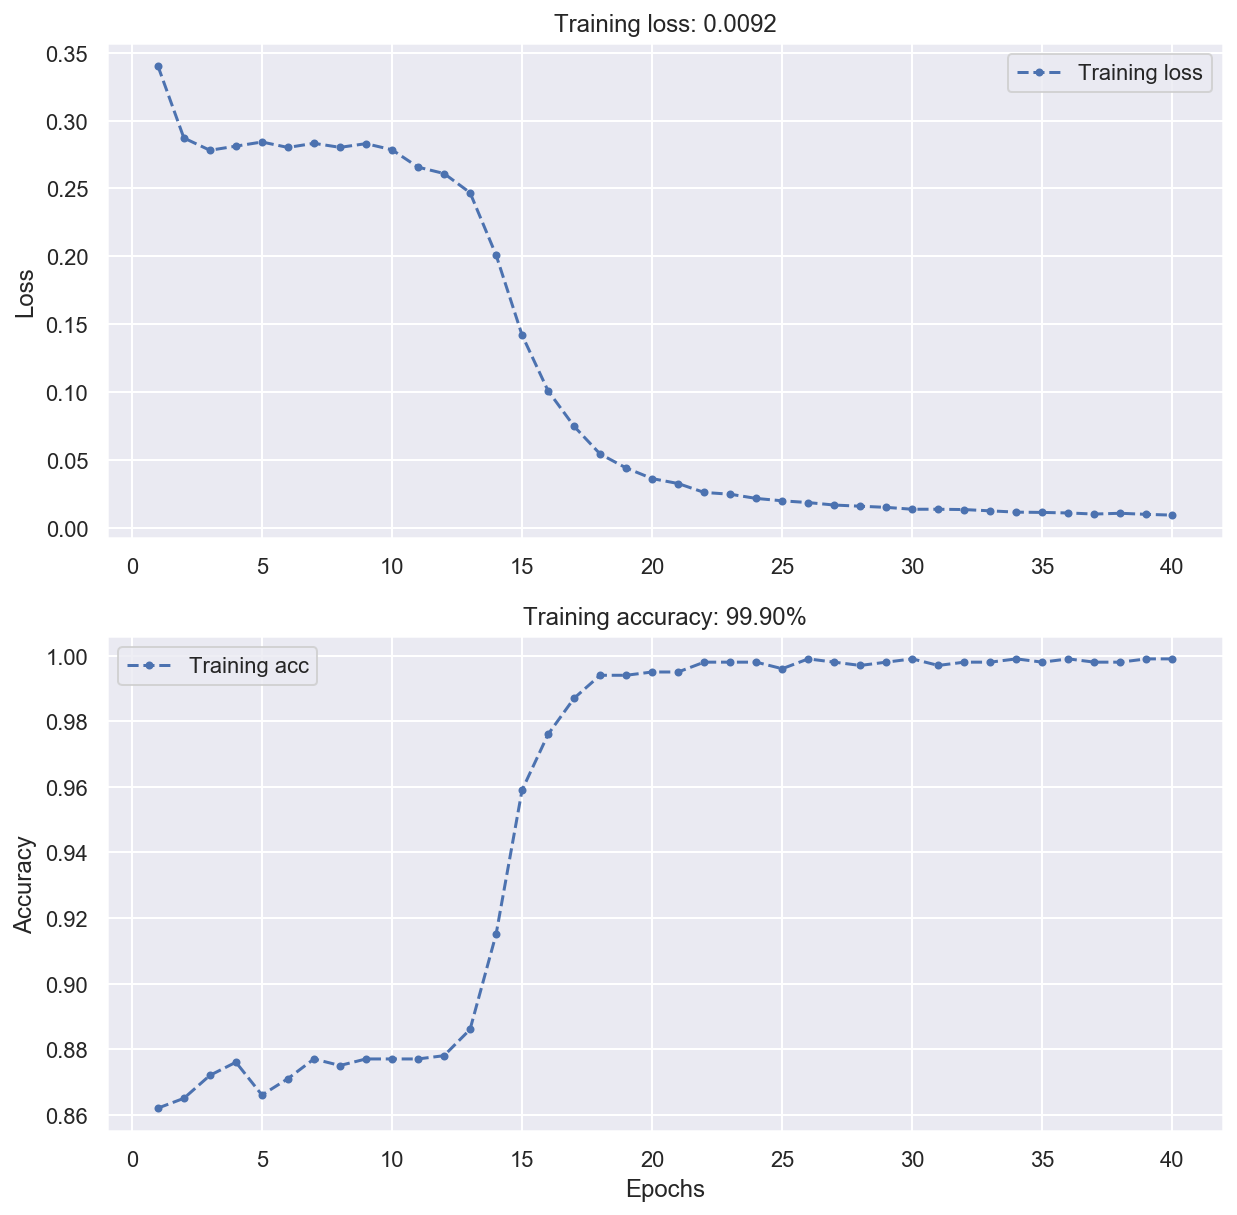

In [11]:
# Plot training metrics
plot_loss_acc(history)

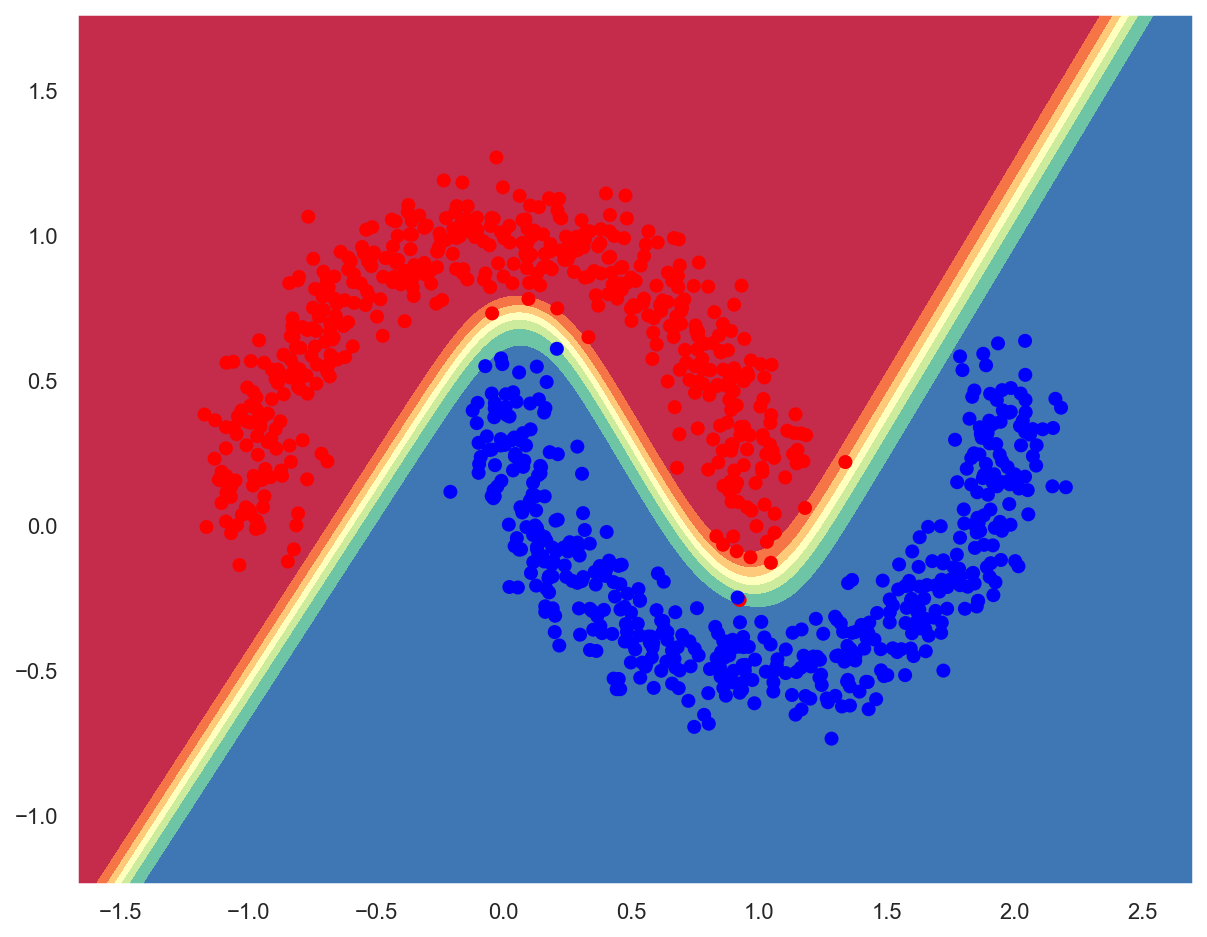

In [12]:
# Plot frontier between predicted classes
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

### Example: training a binary classifier on circle-shaped data

x_train: (1000, 2). y_train: (1000,)


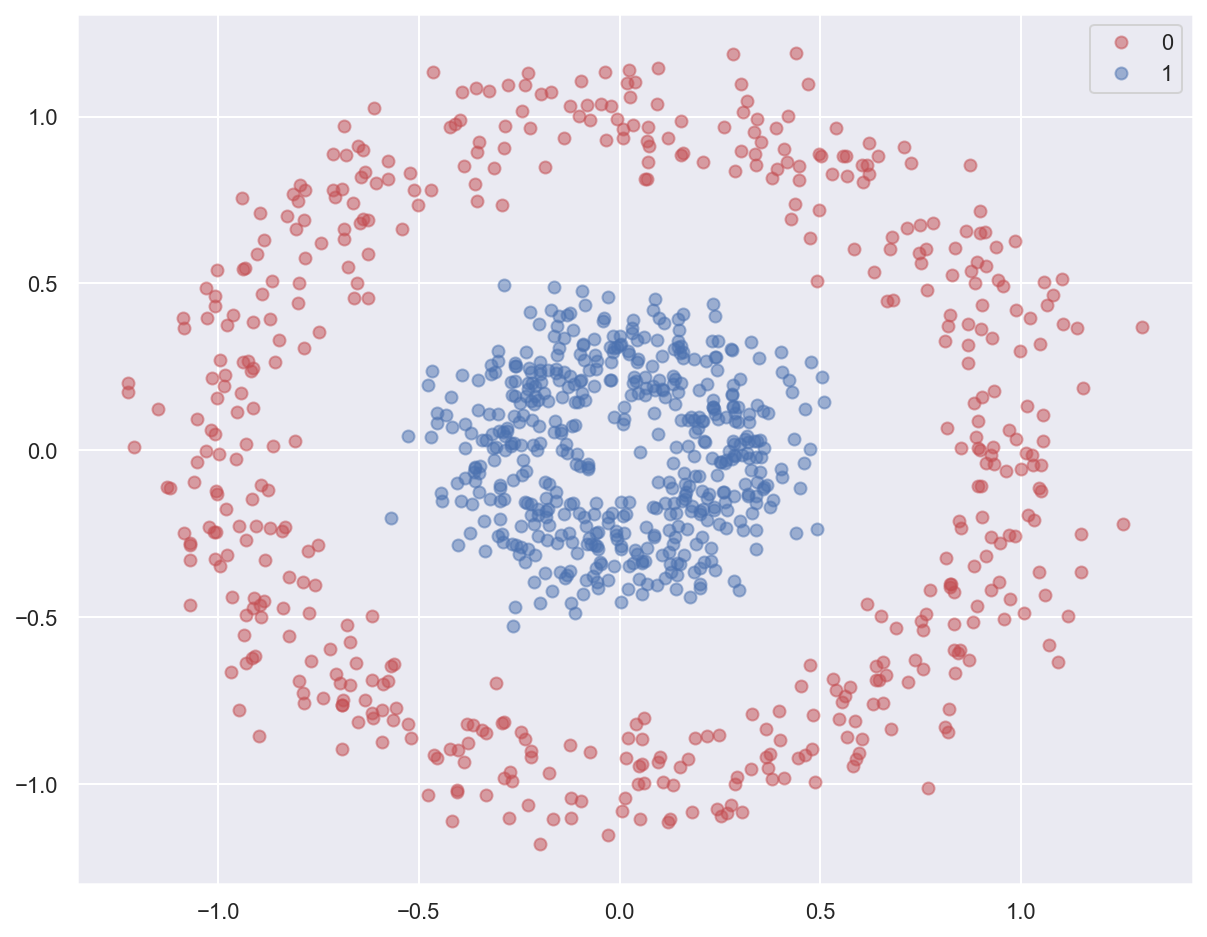

In [13]:
# Generate circle-shaped data
x_train, y_train = make_circles(n_samples=1000, noise=0.10, factor=0.3, random_state=0)

print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
plot_planar_data(x_train, y_train)

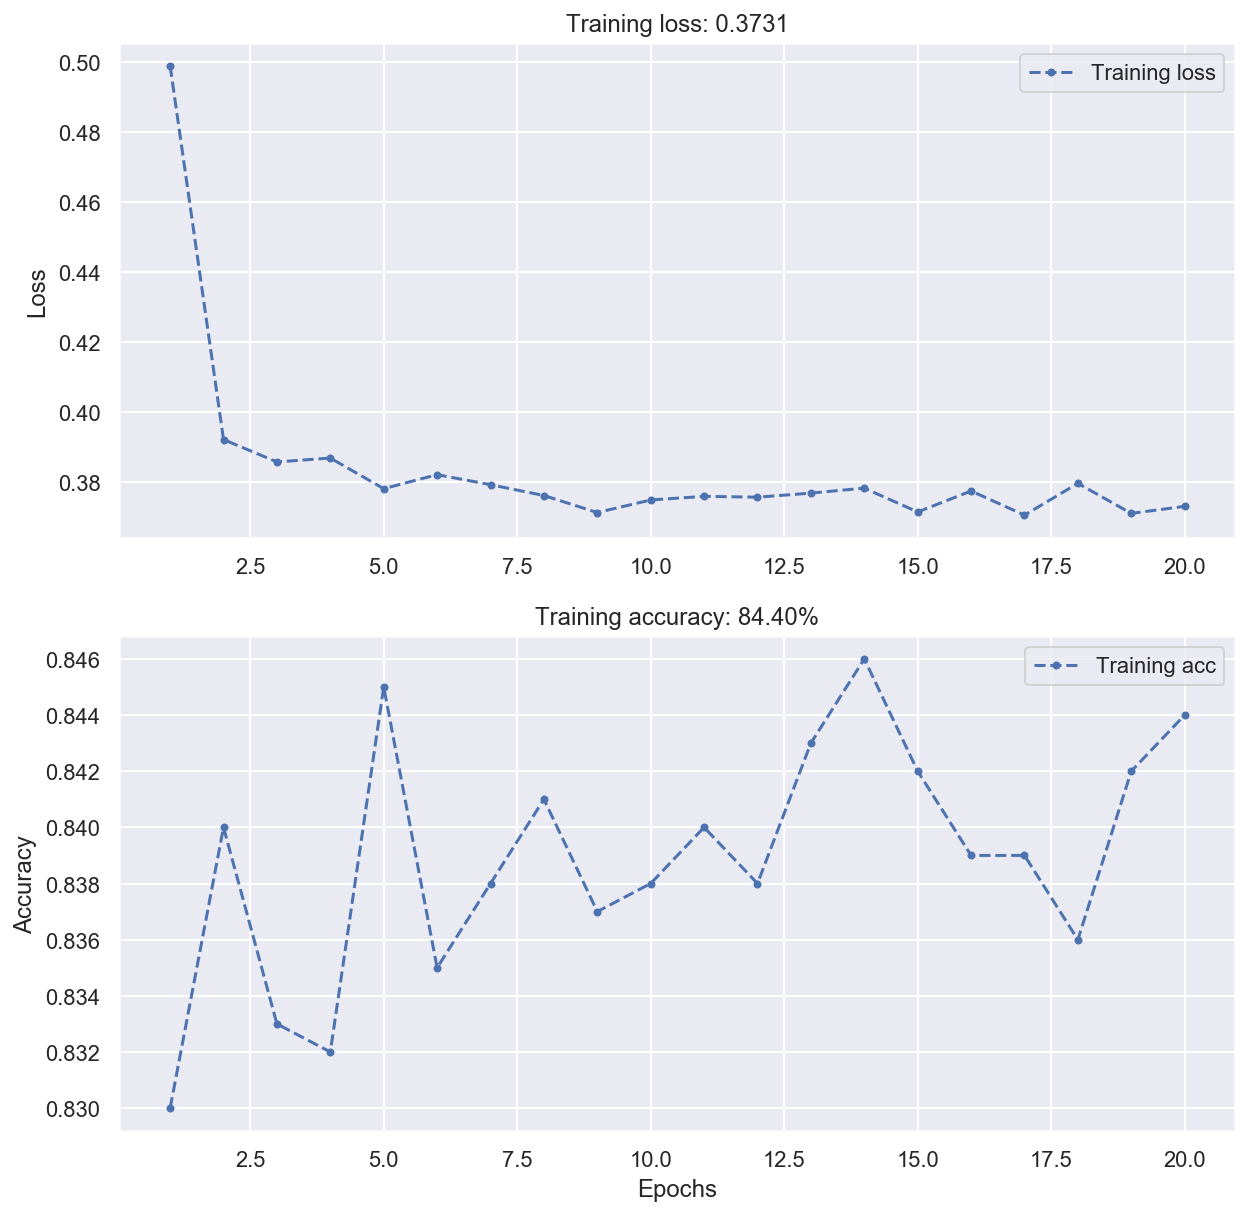

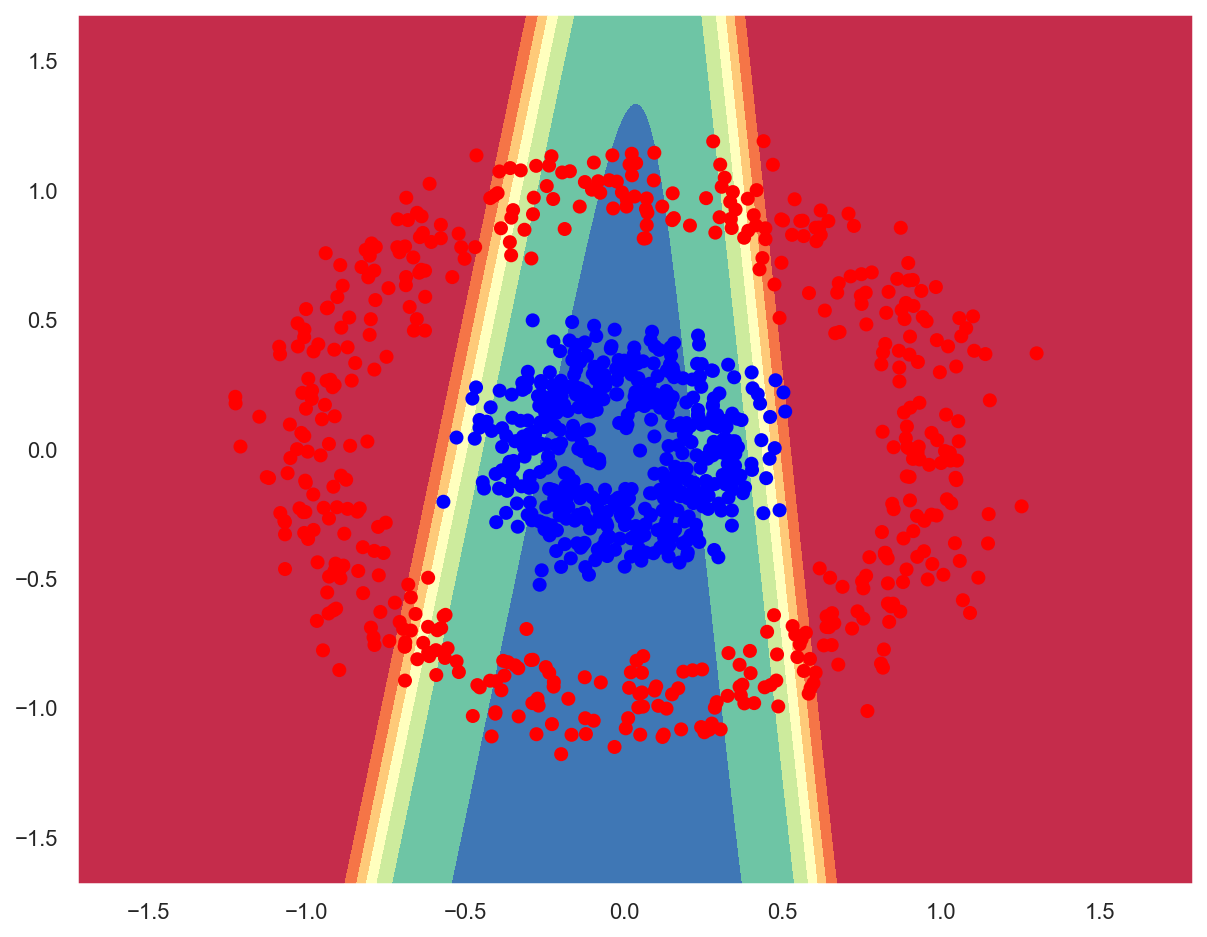

In [14]:
# Train the previous model on the data
history = model.fit(x_train, y_train, verbose=0, epochs=20)

# Show training results
plot_loss_acc(history)
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

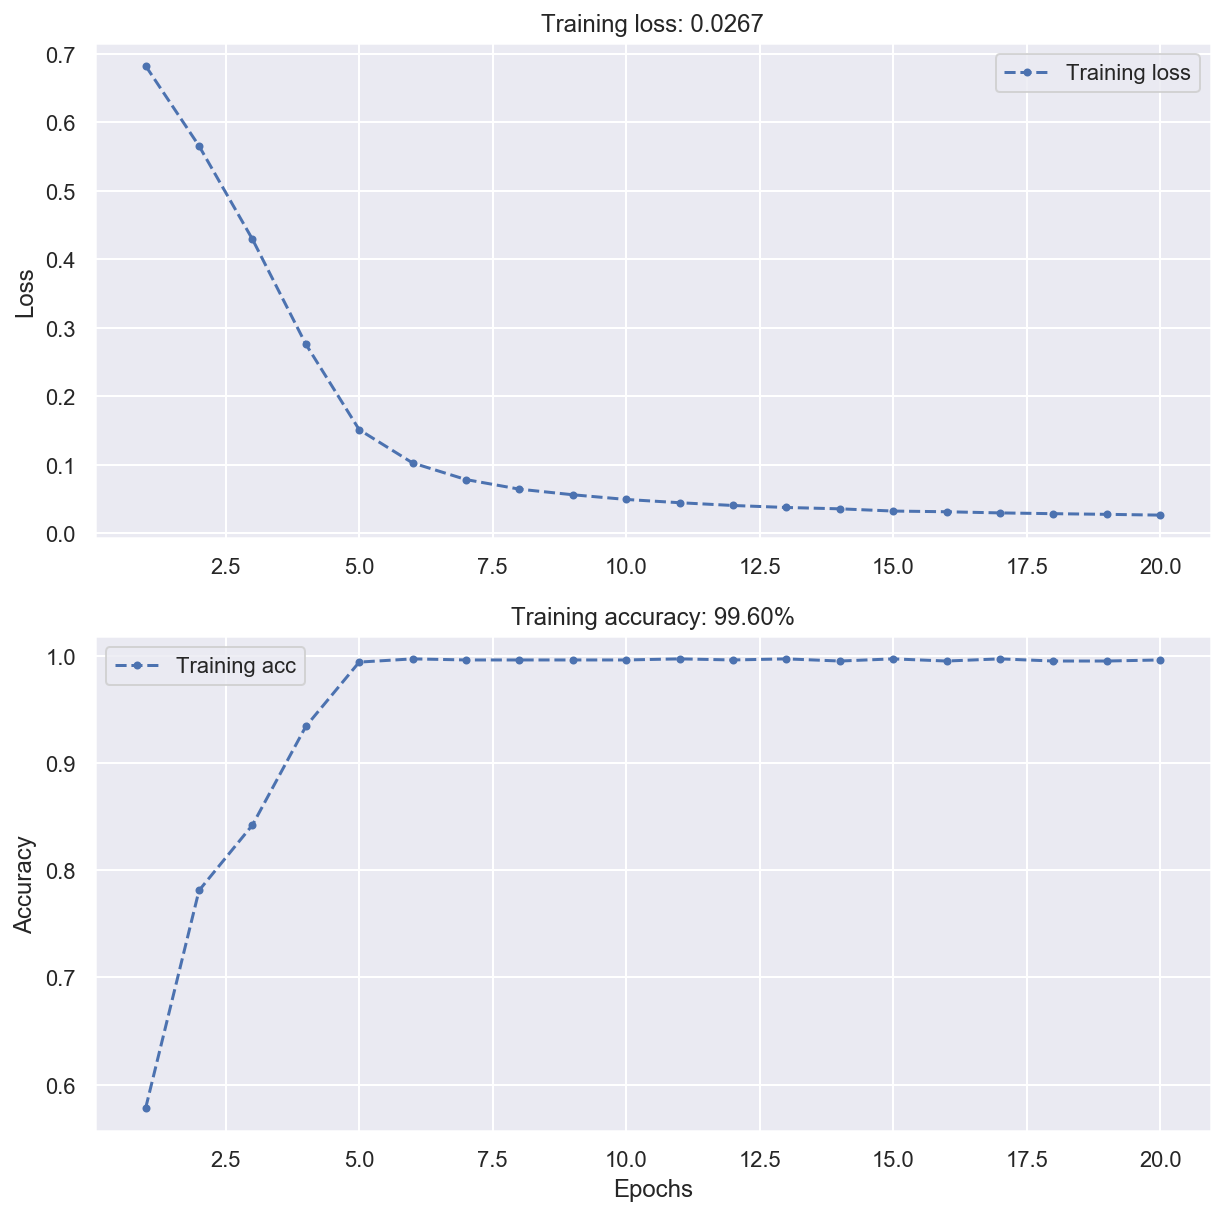

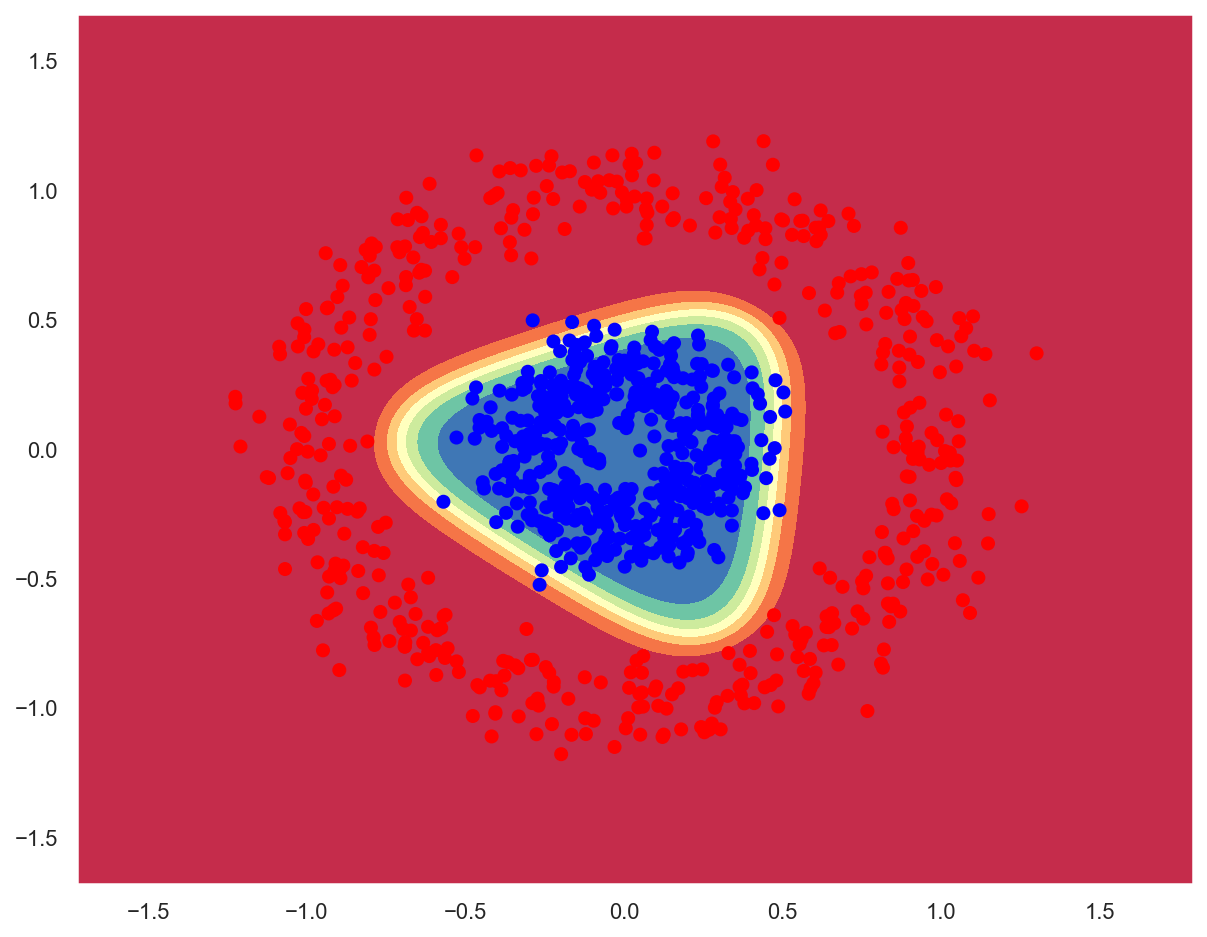

In [15]:
# Add a neuron on the hidden layer for better results
model = Sequential()
model.add(Dense(4, activation='tanh', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(SGD(lr=1.0), 'binary_crossentropy', metrics=['accuracy'])

# Train the model on the data
history = model.fit(x_train, y_train, verbose=0, epochs=20)

# Show training results
plot_loss_acc(history)
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

## Example: training a multiclass classifier to recognize handwritten digits

The MNIST digits dataset contains 70,000 handwritten digits, stored as 28x28 grayscale images.

Once challenging for ML model, it's now seen as the "Hello World" of Computer Vision.

In [16]:
# Load the Keras MNIST digits dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Training images: {train_images.shape}. Training labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}. Test labels: {test_labels.shape}")

Training images: (60000, 28, 28). Training labels: (60000,)
Test images: (10000, 28, 28). Test labels: (10000,)


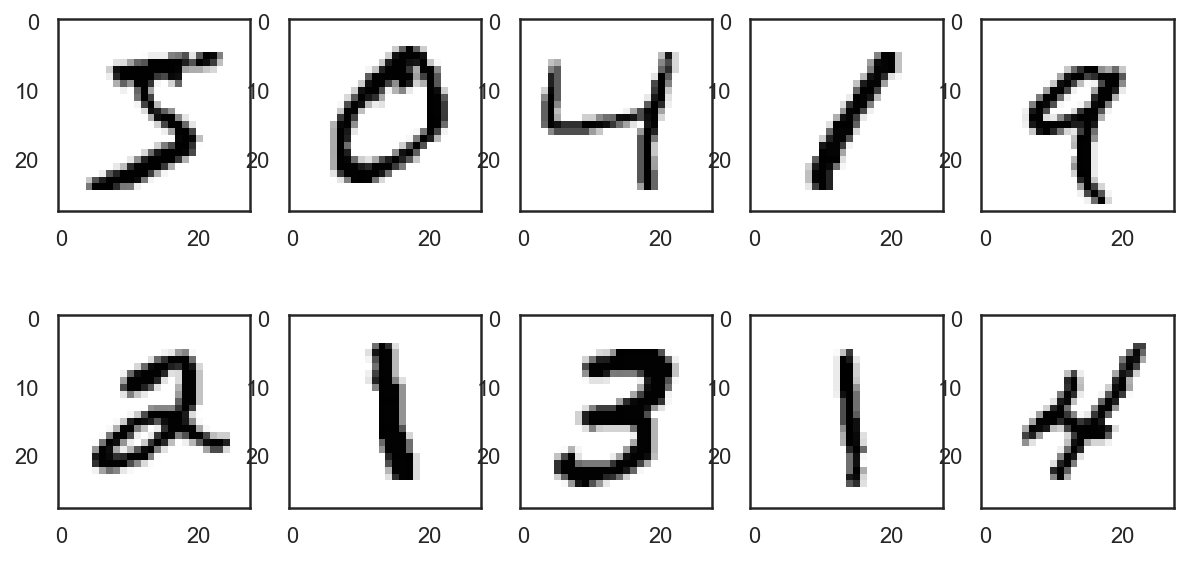

In [17]:
# Plot the first 10 digits
with sns.axes_style('white'):  # Temporary hide Seaborn grid lines
    plt.figure(figsize=(10, 5))
    for i in range(10):
        digit = train_images[i]
        fig = plt.subplot(2, 5, i + 1)
        plt.imshow(digit, cmap=plt.cm.binary)

In [18]:
# Labels are integer scalars between 0 and 9
df_train_labels = pd.DataFrame(train_labels)
df_train_labels.columns = {'digit'}
df_train_labels.sample(n=8)

,digit
54542,7
9615,1
59634,9
11283,4
34244,0
54237,6
8786,3
2988,1


### Data preprocessing

In [19]:
# Change pixel values from (0, 255) to (0, 1)
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255

In [20]:
# One-hot encoding of expected results
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Show a sample of encoded input
df_y_train = pd.DataFrame(y_train)
df_y_train.sample(n=8)

y_train: (60000, 10)
y_test: (10000, 10)


,0,1,2,3,4,5,6,7,8,9
57141,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10555,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Network architecture for MNIST

[![Extract from the book Neural Networks and Deep Learning by M. Nielsen](images/mnist_nn.png)](http://neuralnetworksanddeeplearning.com/chap1.html)

In [21]:
# Create the nn model
model = Sequential()
# The Flatten layer flattens a multidimensional array, removing all dimensions except one
# Here, the 28x28 images are flattened into a vector of 28*28 elements
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(15, activation="relu"))
# The softmax function creates a probability distribution
model.add(Dense(10, activation="softmax"))

# Describe the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


### The softmax function

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K {e^{z_k}}}$$

- Probability distribution for $K$ classes.
- Output is a probability vector.

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5958 - accuracy: 0.8373
Epoch 2/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2950 - accuracy: 0.9160
Epoch 3/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2593 - accuracy: 0.9263
Epoch 4/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2391 - accuracy: 0.9317
Epoch 5/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2263 - accuracy: 0.9349
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2156 - accuracy: 0.9391
Epoch 7/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2078 - accuracy: 0.9407
Epoch 8/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1998 - accuracy: 0.9433
Epoch 9/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1939 - accuracy: 0.9448
Epoch 10/10
60

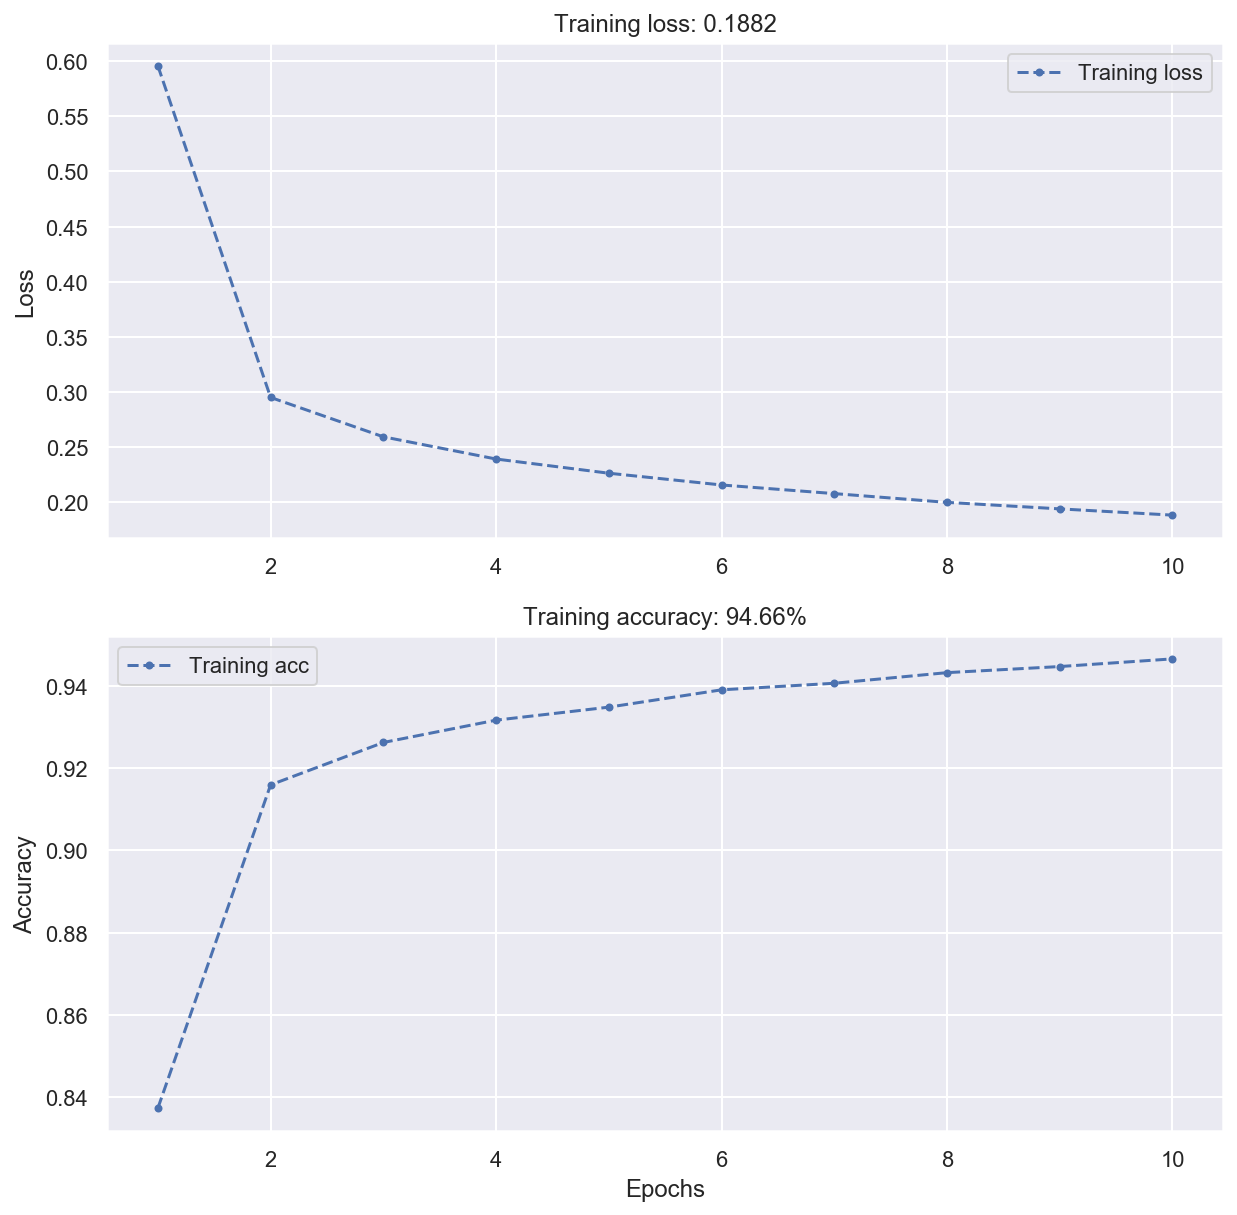

In [22]:
# Train the model and show results
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128)
plot_loss_acc(history)

In [23]:
# Evaluate the model on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 0.94000


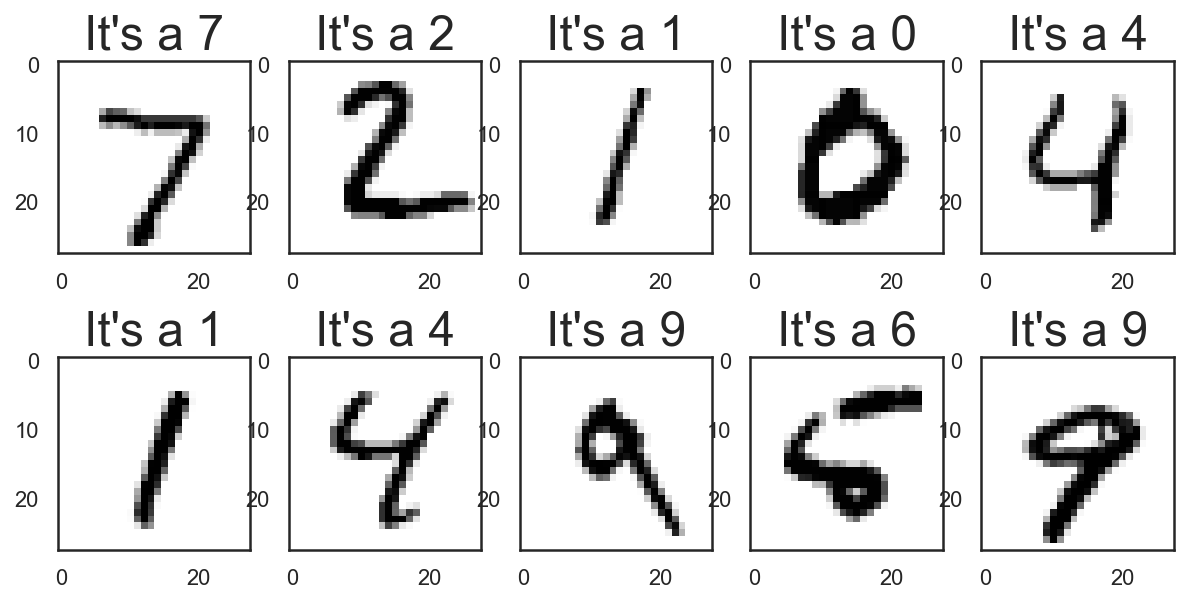

In [24]:
# Plot the first 10 test digits with associated predictions

# Temporary hide Seaborn grid lines
with sns.axes_style('white'):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        digit = test_images[i]
        prediction = np.argmax(model.predict(digit.reshape((1, 28, 28))))
        fig = plt.subplot(2, 5, i + 1)
        plt.title('It\'s a {:d}'.format(prediction), fontsize=24)
        plt.imshow(digit, cmap=plt.cm.binary)

In [25]:
# Saving model for future use
model_json = model.to_json()

with open("model.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights("model.h5")

## Neural networks tuning

### Hyperparameters choice

- Number of layers
- Number of neurons on hidden layers
- Activation functions
- Learning rate
- Mini-batch size
- ...

### Gradient Descent optimization

[![Gradient Descent evolution map](images/gradient_descent_evolution_map.png)](https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9)

### Momentum

Increase the descent speed in the direction of the minimum.

Image: a ball rolling down on a hill.

![Momentum](images/momentum.png)

### Other techniques

- **RMSprop** (*Root Mean Square Prop*) : use the previous gradients to update the _learning rate_.
- **Adam** (*Adaptive Moment Estimation*) : combines Momentum and RMSprop

[An overview of gradient descent optimization algorithms](http://ruder.io/optimizing-gradient-descent/)

### The optimization/generalization dilemna

- Tackle underfitting:
  - Use a more complex network
  - Train the network longer

- Tackle overfitting:
  - Use more training data
  - Limit the network size
  - Introduce regularization
  - Introduce dropout

### Observing underfitting and overfitting

Inspired by [this article](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/).

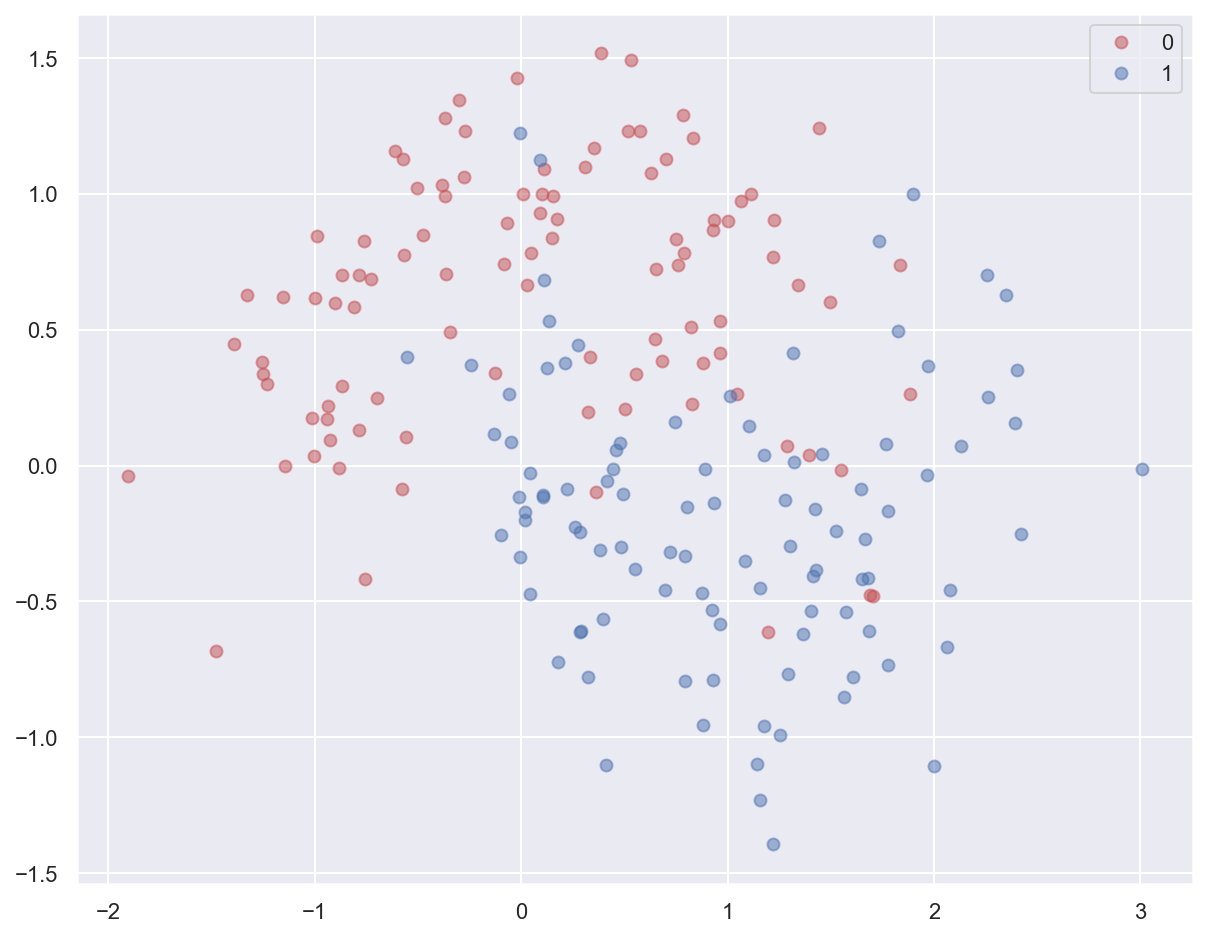

In [26]:
# Generate moon-shaped data with some noise
x_train, y_train = make_moons(200, noise=0.40)

plot_planar_data(x_train, y_train)

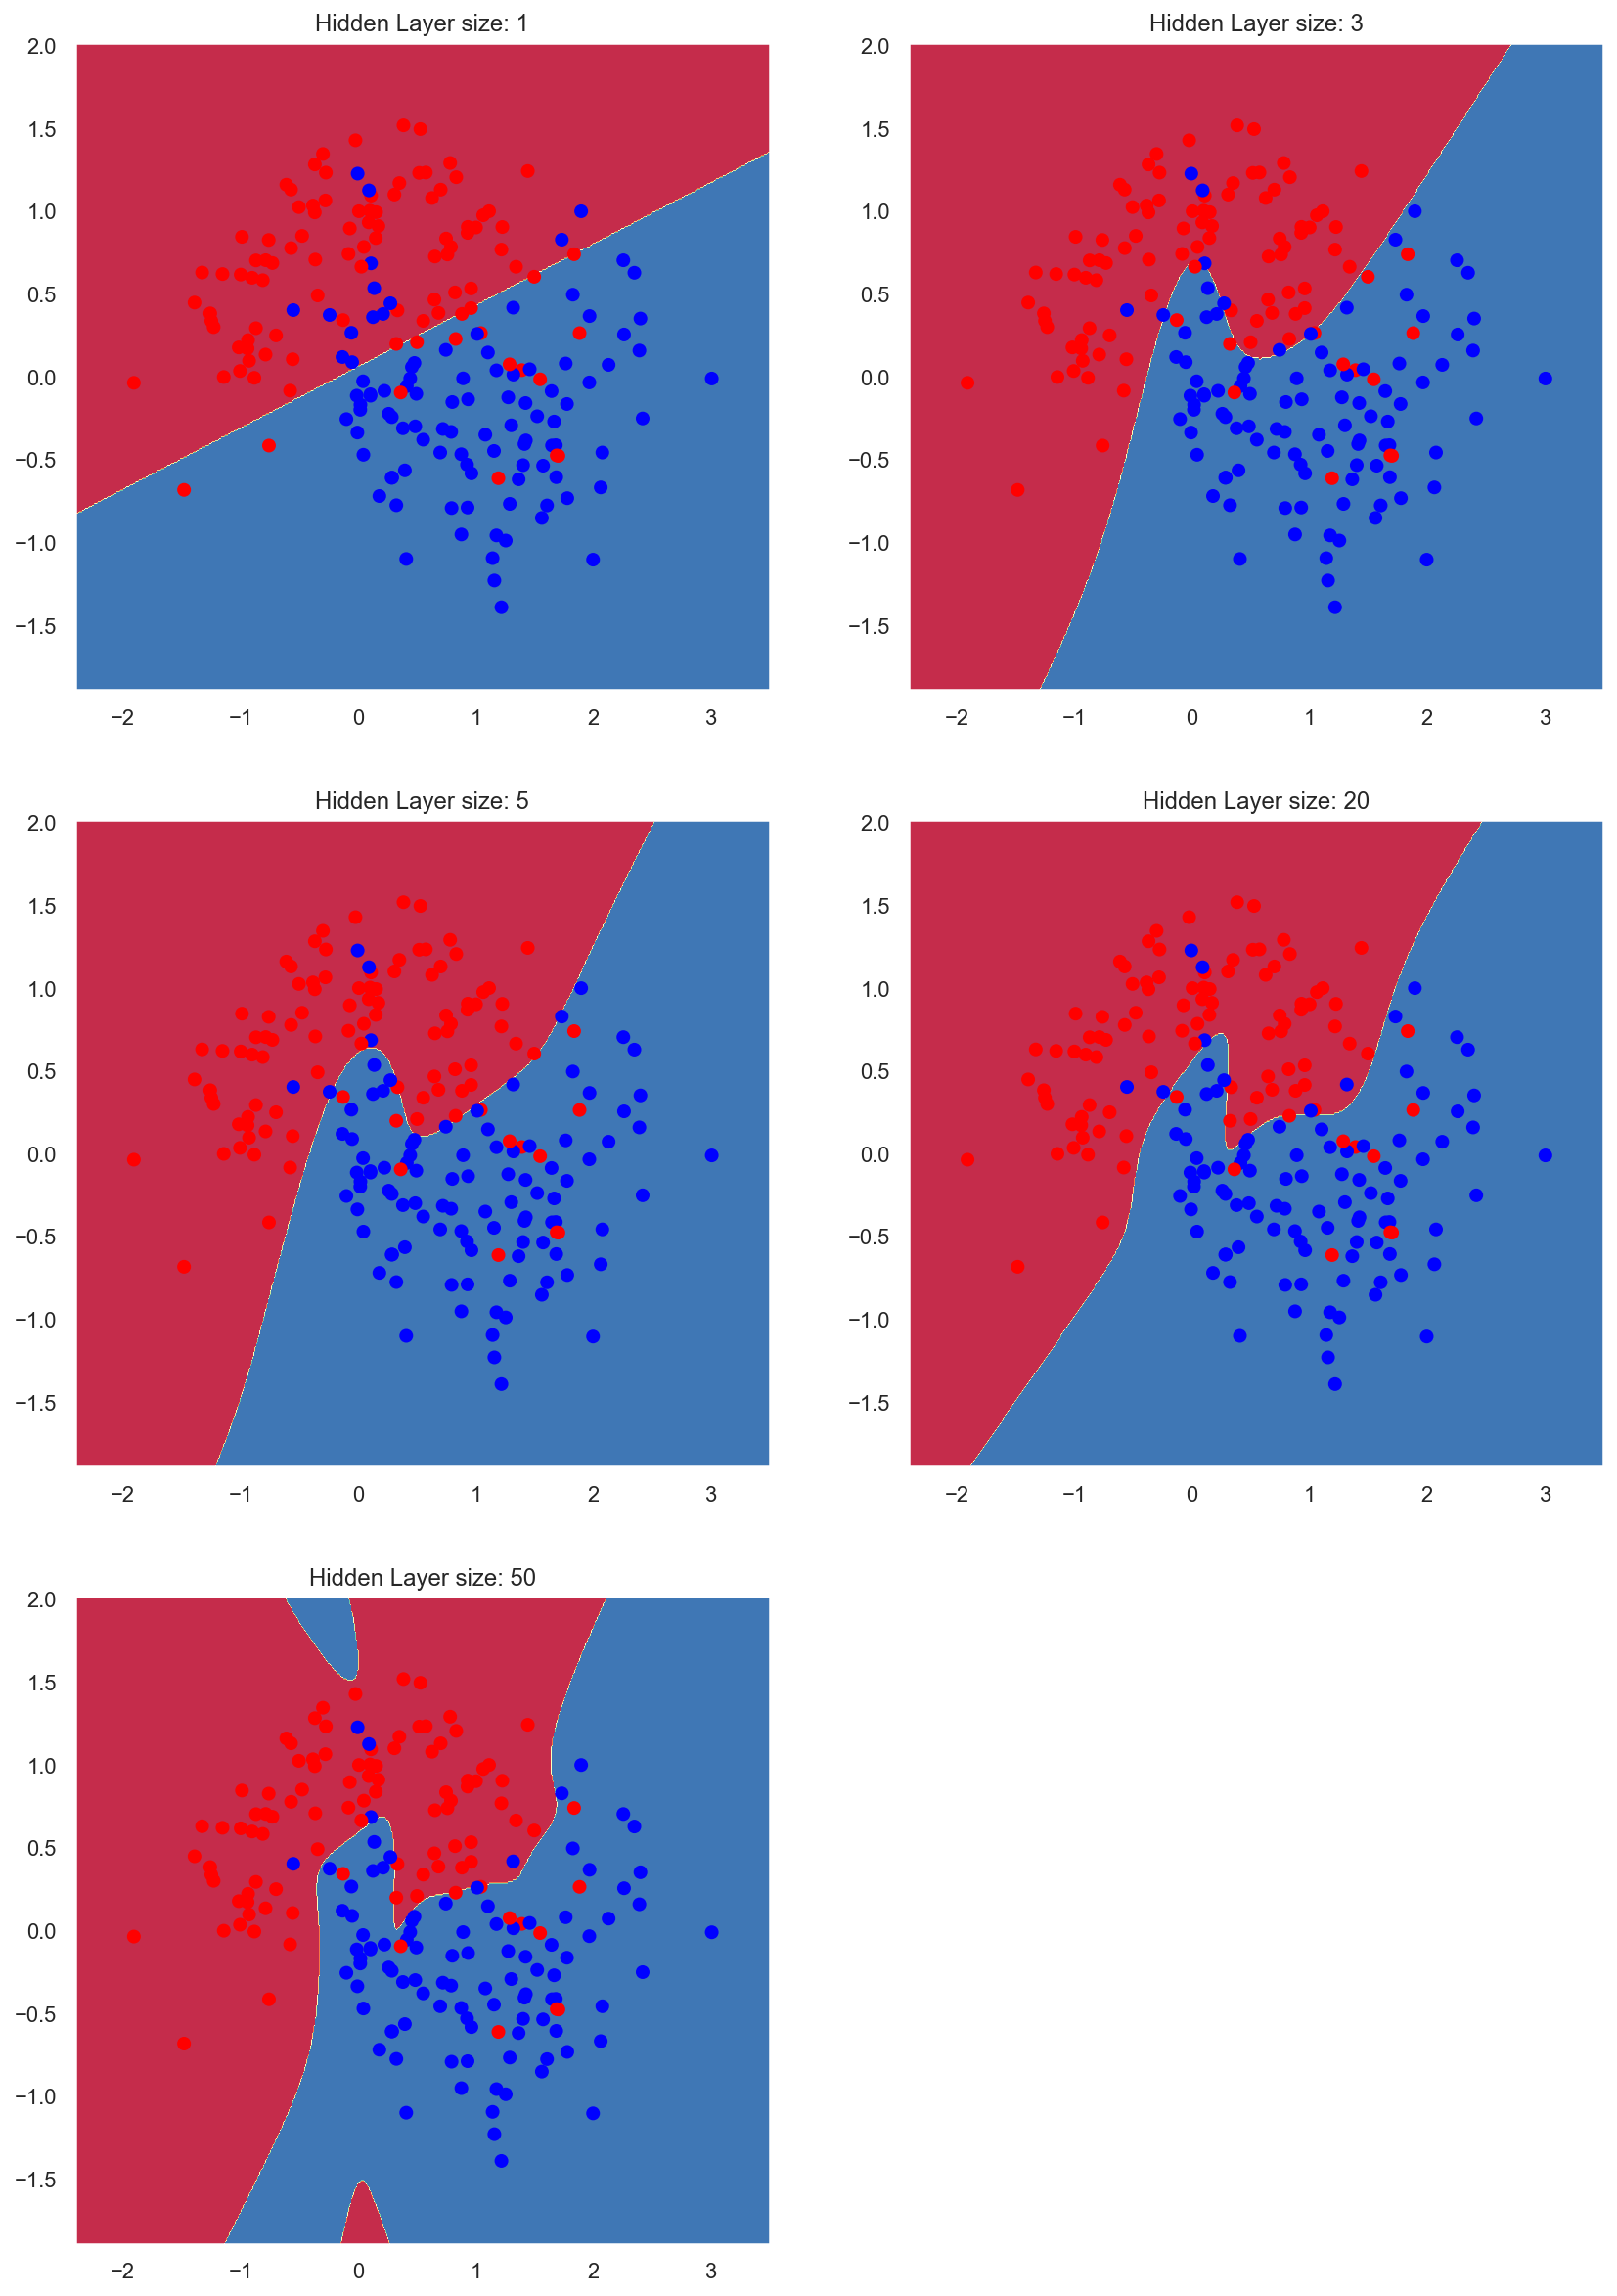

In [27]:
# Varying the hidden layer size to observe underfitting and overfitting

plt.figure(figsize=(14, 28))
hidden_layer_dimensions = [1, 3, 5, 20, 50]
for i, hidden_layer_size in enumerate(hidden_layer_dimensions):
    fig = plt.subplot(4, 2, i+1)
    plt.title('Hidden Layer size: {:d}'.format(hidden_layer_size))
    
    model = Sequential()
    model.add(Dense(hidden_layer_size, activation='tanh', input_shape=(2,)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Batch size = dataset size => batch gradient descent
    history = model.fit(x_train, y_train, verbose=0, epochs=5000, batch_size=x_train.shape[0])

    plot_decision_boundary(lambda x: model.predict(x) > 0.5, x_train, y_train, fig)

### Tackling overfitting

#### Regularization

Limit weights values by adding a penalty to the loss function.

- **L1** : $\frac{\lambda}{m} {\sum |{\mathbf{\theta}_{ij}}|}$
- **L2** : $\frac{\lambda}{m} {\sum {\mathbf{\theta}_{ij}}^2}$

$\lambda$ is called the **regularization rate**.

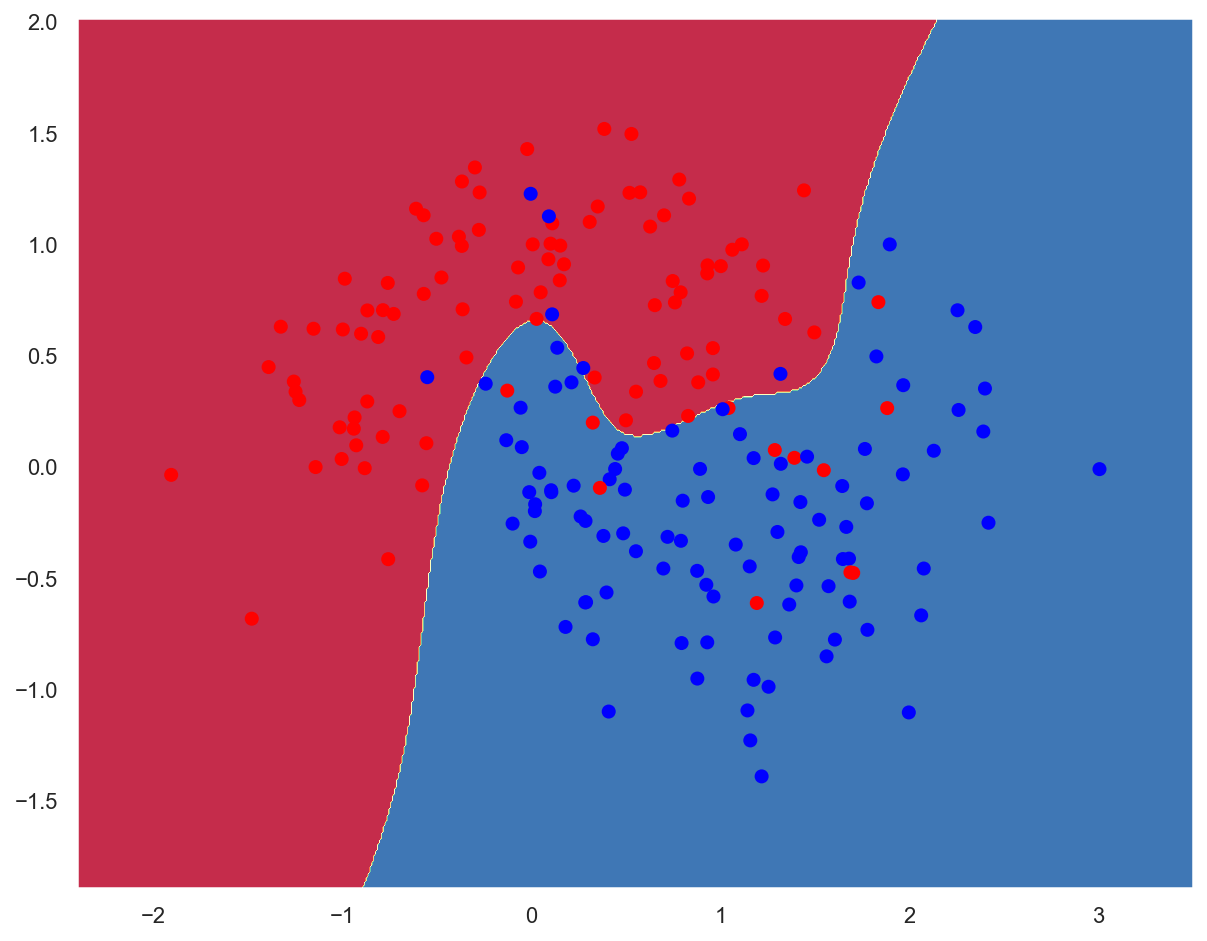

In [28]:
model = Sequential()

# Use L1 regularization on hidden layer
model.add(Dense(50, activation='tanh', input_shape=(2,), 
                kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy', metrics=['accuracy'])

# Batch size = dataset size => batch gradient descent
history = model.fit(x_train, y_train, verbose=0, epochs=5000, batch_size=x_train.shape[0])

plot_decision_boundary(lambda x: model.predict(x) > 0.5, x_train, y_train)

#### Dropout

During training, some weights are randomly set to 0. The network must adapt and become more generic.

![Dropout](images/dropout.png)

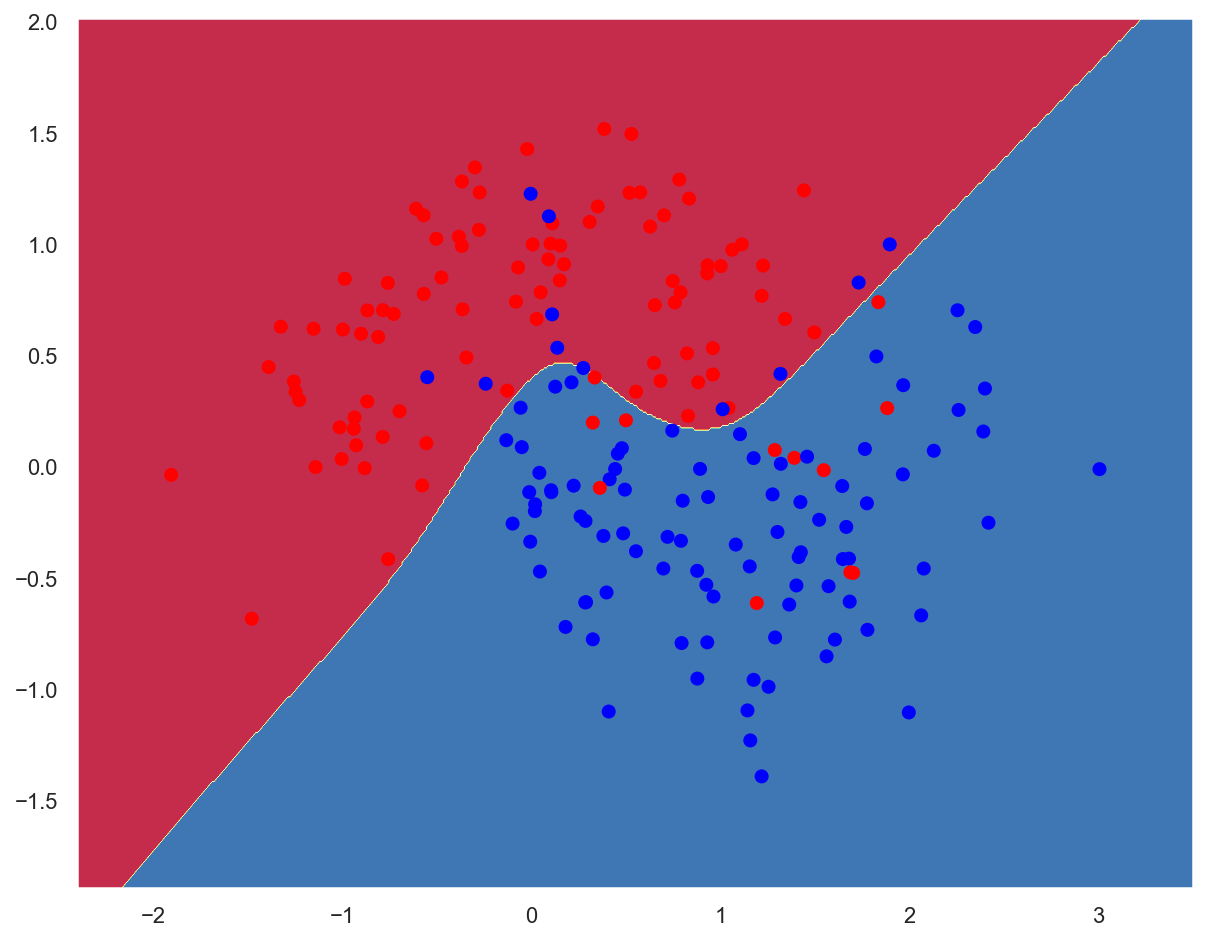

In [29]:
model = Sequential()

# Use 25% dropout on hidden layer
model.add(Dense(50, activation='tanh', input_shape=(2,)))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy', metrics=['accuracy'])

# Batch size = dataset size => batch gradient descent
history = model.fit(x_train, y_train, verbose=0, epochs=5000, batch_size=x_train.shape[0])

plot_decision_boundary(lambda x: model.predict(x) > 0.5, x_train, y_train)

### Demo time!

Train a complete neural network on the [TensorFlow Playground](https://playground.tensorflow.org)

### Overfitting on a real-world example

Heavily inspired by a use case in François Chollet's book [Deep Learning With Python](https://www.manning.com/books/deep-learning-with-python).

In [30]:
# Load the Keras IMDB dataset
# We only keep the top 10,000 most frequently occuring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(f'Training data: {train_data.shape}. Training labels: {train_labels.shape}')

# Reviews are encoded as lists of word indexes
# Words are indexed by overall frequency in the dataset
print(f'First review: {train_data[0]}')

# Labels are binary integers: 0 for a negative review, 1 for a positive one
print(f'First label: {train_labels[0]}')

Training data: (25000,). Training labels: (25000,)
First review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [31]:
# Show the first review as text

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [32]:
# Preparation of data for training

def vectorize_sequences(sequences, dimension=10000):
    """One-hot encode a vector of sequences into a binary matrix (number of sequences, dimension)"""

    # Example : [[3, 5]] -> [[0. 0. 0. 1. 0. 1. 0...]]

    results = np.zeros((len(sequences), dimension))
    # set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Turn reviews into vectors of 0s and 1s (one-hot encoding)
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Set apart the first 10,000 reviews as validation data
x_val, x_train = x_train[:10000], x_train[10000:]
y_val, y_train = train_labels[:10000], train_labels[10000:]

y_test = test_labels

print(f'x_train: {x_train.shape}. x_val: {x_val.shape}')

x_train: (15000, 10000). x_val: (10000, 10000)


In [33]:
# Show a sample of encoded input
df_x_train = pd.DataFrame(x_train)
df_x_train.sample(n=10)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1908,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11016,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11869,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12335,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12918,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1509,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14298,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13054,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6184,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Build a nn with two hidden layers to demonstrate overfitting
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Show model info
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_30 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 163us/sample - loss: 0.5188 - accuracy: 0.7826 - val_loss: 0.4045 - val_accuracy: 0.8514
Epoch 2/20
15000/15000 [==============================] - 2s 102us/sample - loss: 0.3130 - accuracy: 0.9019 - val_loss: 0.3119 - val_accuracy: 0.8846
Epoch 3/20
15000/15000 [==============================] - 2s 103us/sample - loss: 0.2282 - accuracy: 0.9289 - val_loss: 0.2802 - val_accuracy: 0.8904
Epoch 4/20
15000/15000 [==============================] - 2s 103us/sample - loss: 0.1798 - accuracy: 0.9425 - val_loss: 0.2735 - val_accuracy: 0.8910
Epoch 5/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.1460 - accuracy: 0.9527 - val_loss: 0.2831 - val_accuracy: 0.8876
Epoch 6/20
15000/15000 [==============================] - 2s 101us/sample - loss: 0.1213 - accuracy: 0.9624 - val_loss: 0.2908 - val_accuracy: 0.8874
Epoch 7/20
15000/15000 [==========================

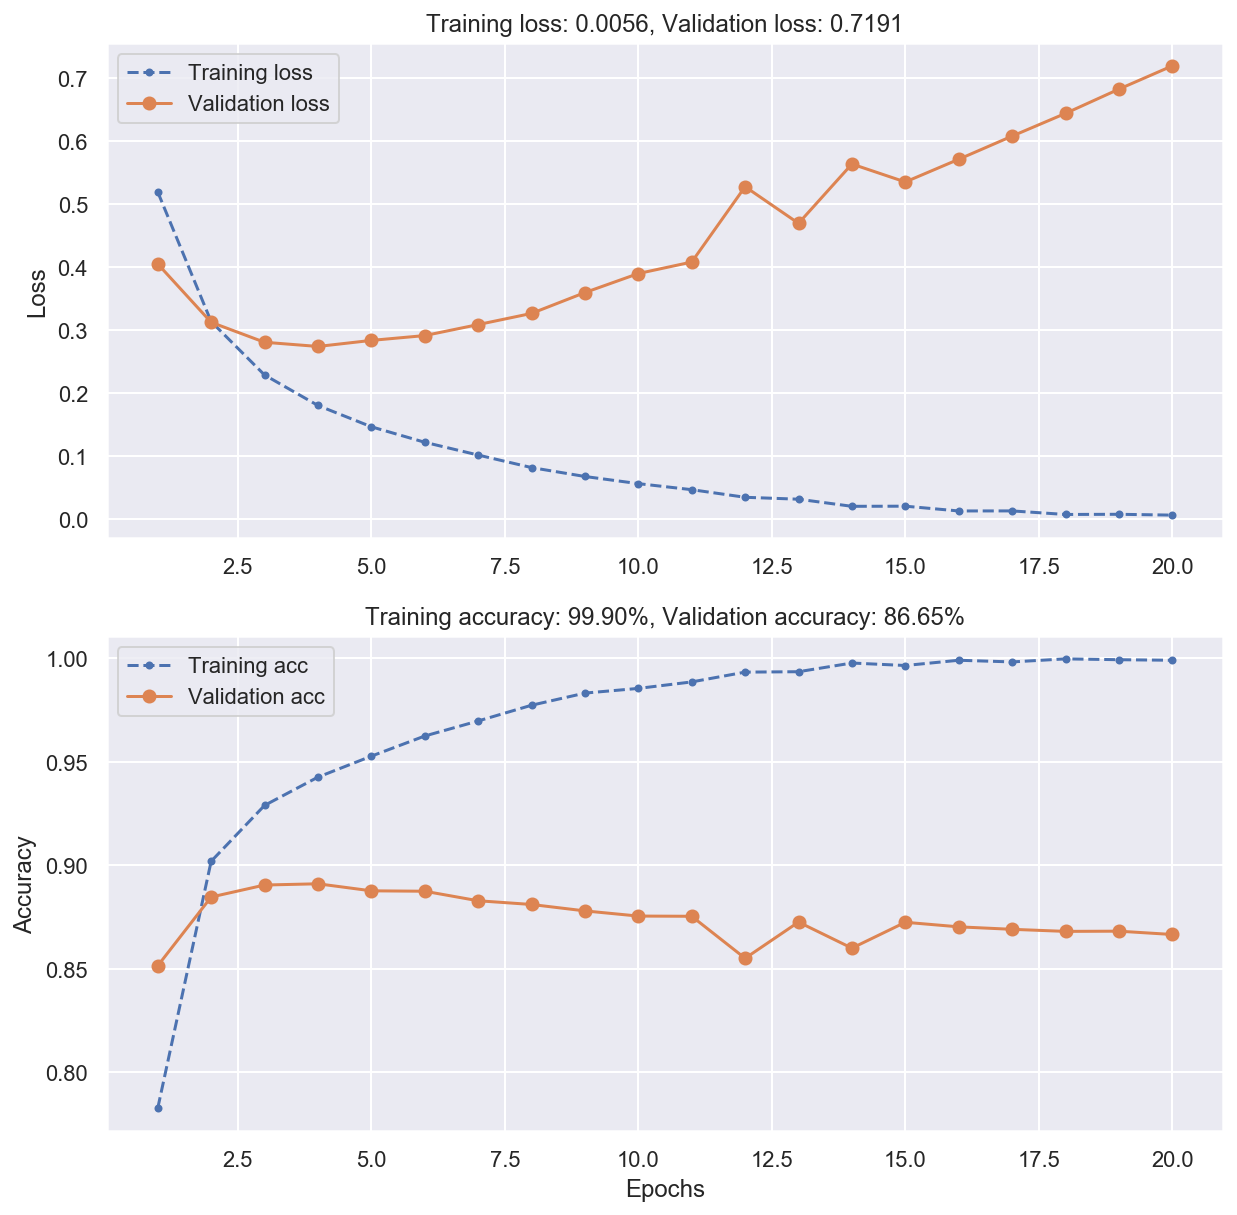

In [42]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We also record validation history during training
history = model.fit(x_train, y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))
plot_loss_acc(history)

In [43]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc:.5f}')

Test accuracy: 0.85000


#### Reducing network size

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 8)                 80008     
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 161us/sample - loss: 0.5137 - accuracy: 0.7817 - val_loss: 0.3951 - val_accuracy: 0.8665
Epoch 2/20
15000/15000 [==============================] - 2s 111us/sample - loss: 0.3193 - accuracy: 0.9011 - val_loss: 0.3206 - val_accuracy: 0.8829
Epoch 3/20
15000/15000 [=====

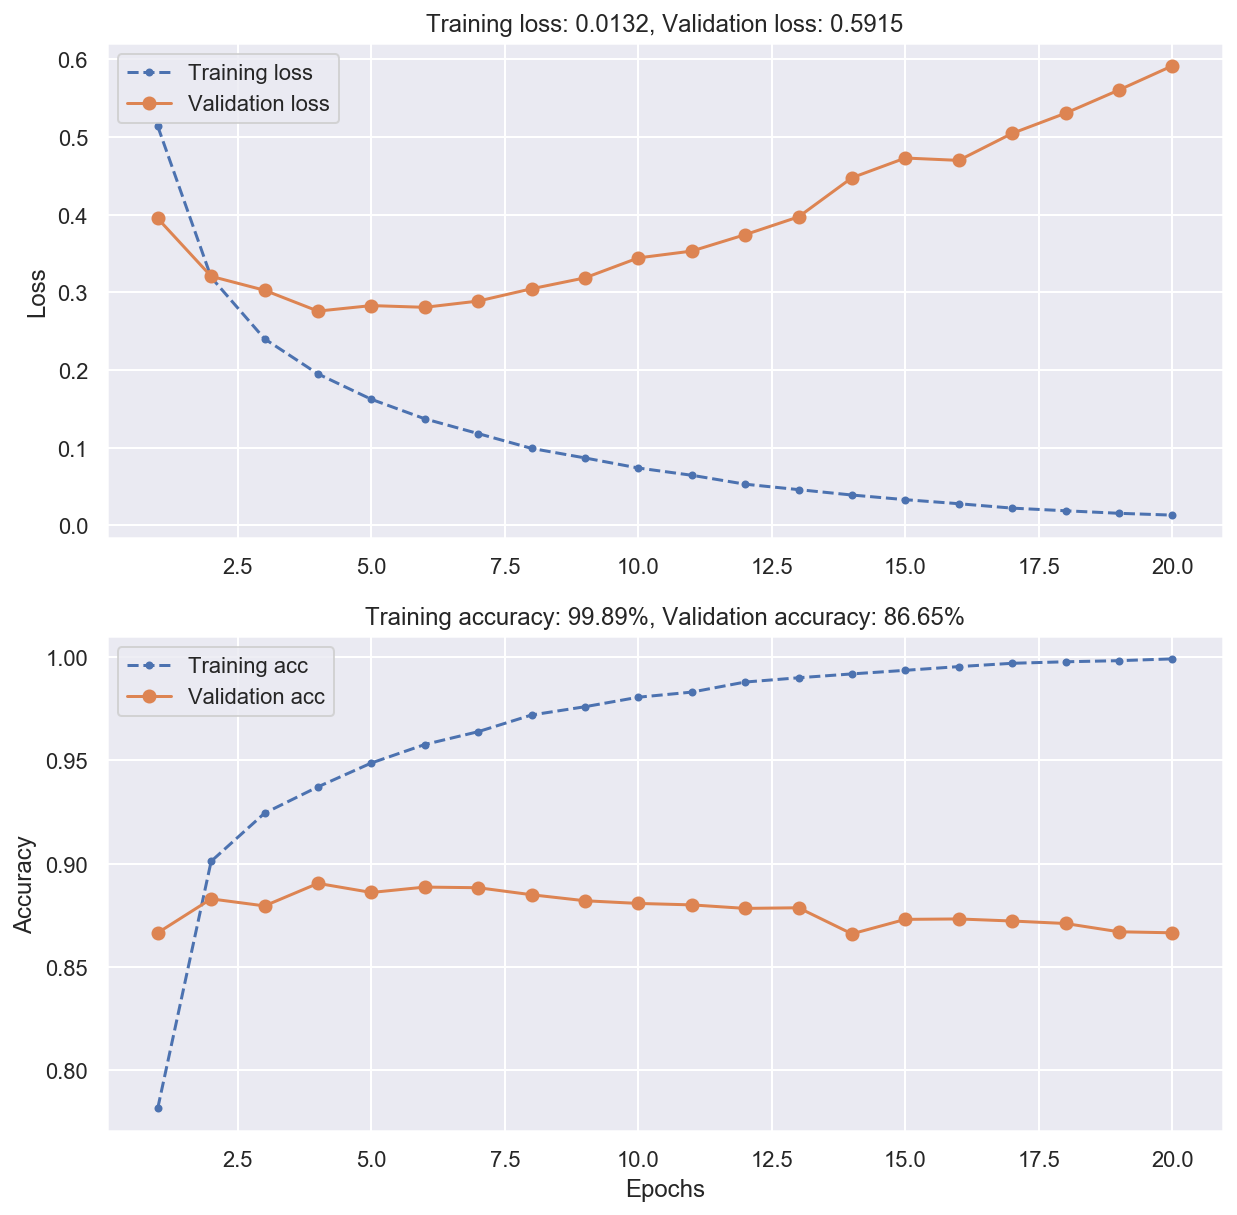

In [44]:
# Build and train a smaller network
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(10000,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Show model info to check the new number of parameters
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))
plot_loss_acc(history)

#### Regularization

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 8)                 80008     
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 177us/sample - loss: 0.6191 - accuracy: 0.6307 - val_loss: 0.5559 - val_accuracy: 0.7467
Epoch 2/20
15000/15000 [==============================] - 2s 102us/sample - loss: 0.4899 - accuracy: 0.8529 - val_loss: 0.4831 - val_accuracy: 0.8047
Epoch 3/20
15000/15000 [=====

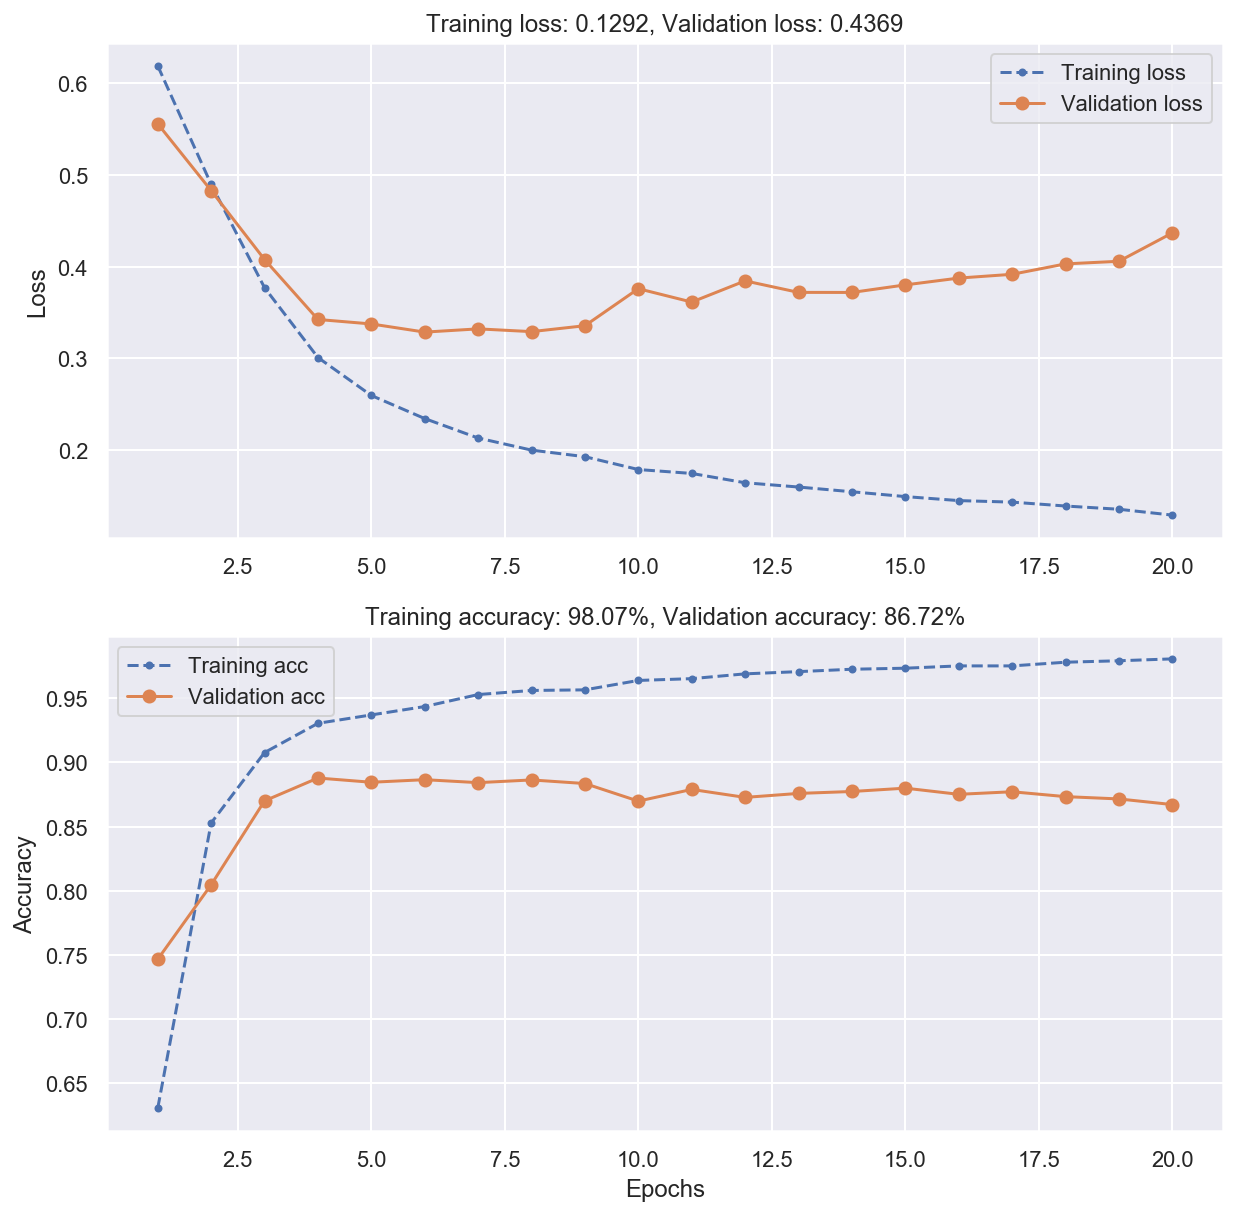

In [45]:
# Create the same model as before but now using L2 regularization
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(10000,),
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

# Show model info
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))
plot_loss_acc(history)

#### Dropout

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 8)                 80008     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 145u

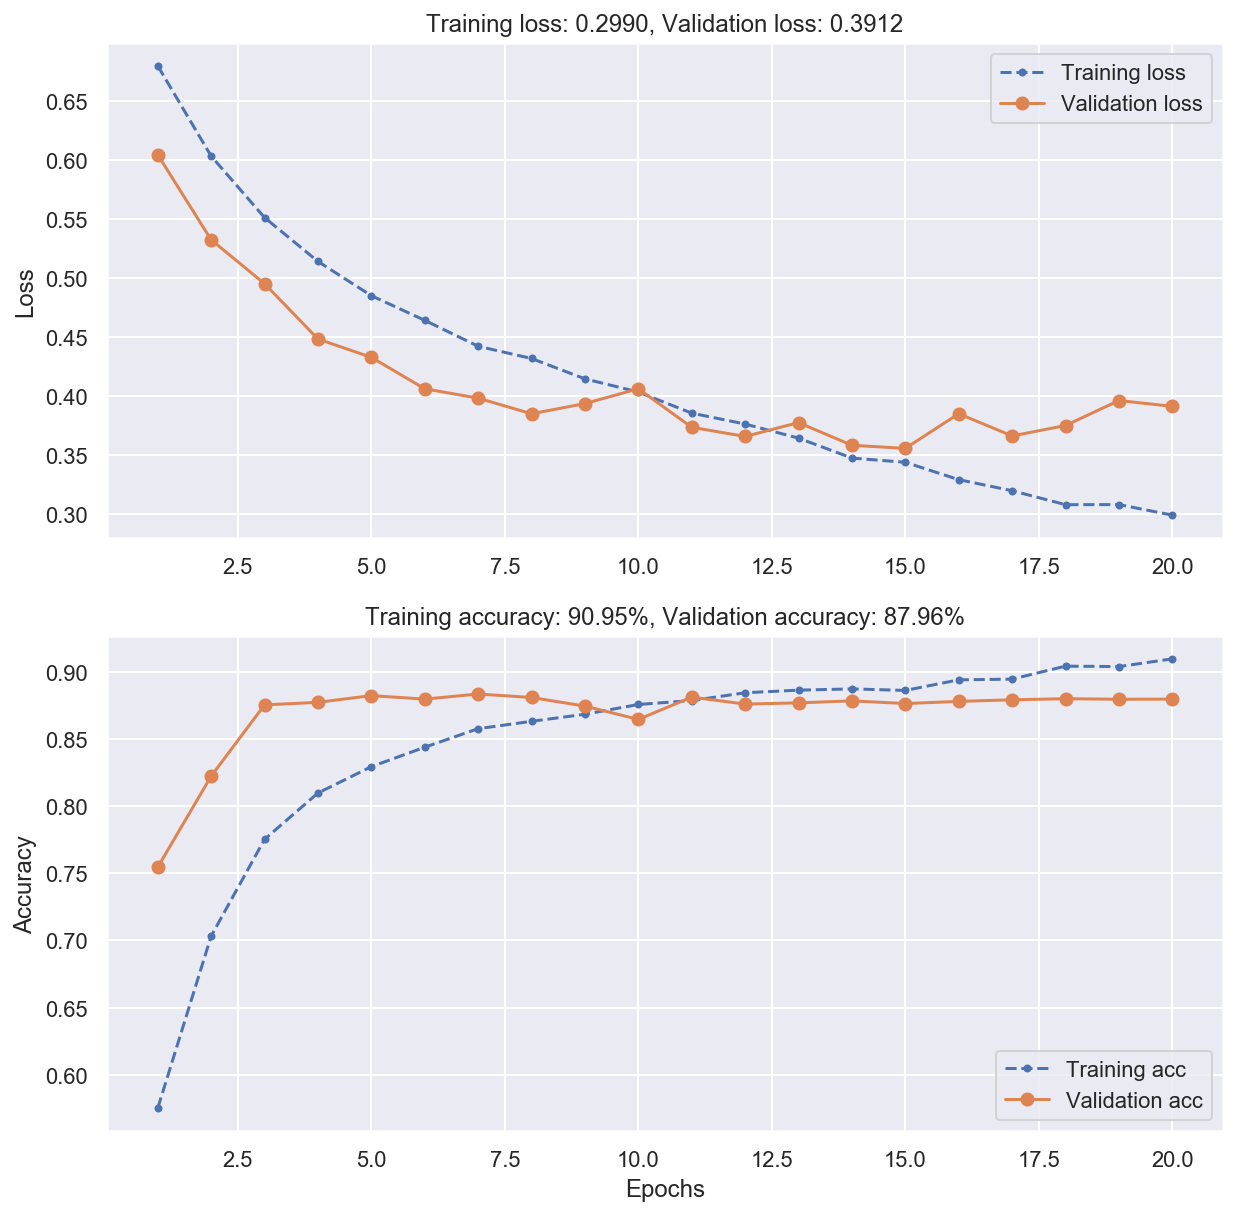

In [46]:
# Add 50% dropout to the two hidden layers
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(10000,),
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Show model info
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))
plot_loss_acc(history)

In [47]:
# Evaluate tuned model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc:.5f}')

Test accuracy: 0.87108
